# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | usogorsk
Processing Record 4 of Set 1 | kudahuvadhoo
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | coihueco
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | nadym
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | anqing
Processing Record 14 of Set 1 | nyurba
Processing Record 15 of Set 1 | sao felix do xingu
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | tidjikja
Processing Record 18 of Set 1 | kota tinggi
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | mitu
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | gurupi
Processing Record 23 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,22.72,35,0,2.81,ZA,1693296478
1,lebu,-37.6167,-73.6500,8.68,76,79,1.96,CL,1693296478
2,usogorsk,63.4106,48.6872,14.84,55,62,0.88,RU,1693296478
3,kudahuvadhoo,2.6708,72.8944,27.47,75,89,4.69,MV,1693296479
4,puerto natales,-51.7236,-72.4875,-0.77,92,96,1.47,CL,1693296479


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,22.72,35,0,2.81,ZA,1693296478
1,lebu,-37.6167,-73.6500,8.68,76,79,1.96,CL,1693296478
2,usogorsk,63.4106,48.6872,14.84,55,62,0.88,RU,1693296478
3,kudahuvadhoo,2.6708,72.8944,27.47,75,89,4.69,MV,1693296479
4,puerto natales,-51.7236,-72.4875,-0.77,92,96,1.47,CL,1693296479


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

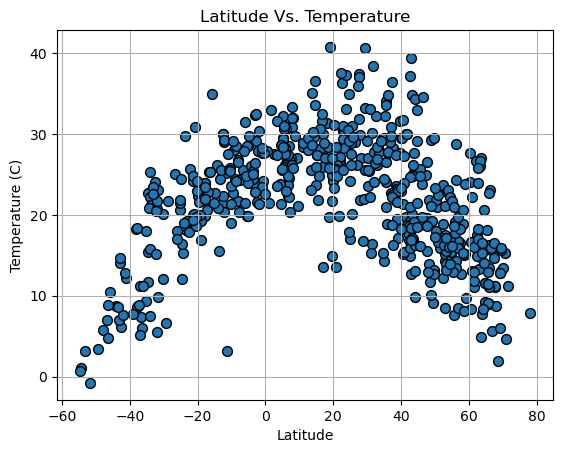

In [8]:
# Build scatter plot for latitude vs. temperature and incorporate propoerties
city_data_df.plot(kind='scatter', x = 'Lat', xlabel = 'Latitude', y = 'Max Temp', ylabel = 'Temperature (C)', marker = 'o', title = 'Latitude Vs. Temperature', edgecolor = 'black', s = 50)
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

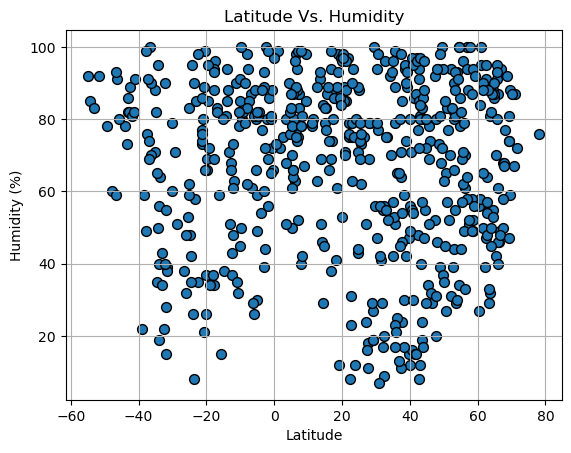

In [9]:
# Build scatter plot for latitude vs. temperature and incorporate propoerties
city_data_df.plot(kind='scatter', x = 'Lat', xlabel = 'Latitude', y = 'Humidity', ylabel = 'Humidity (%)', marker = 'o', title = 'Latitude Vs. Humidity', edgecolor = 'black', s = 50)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

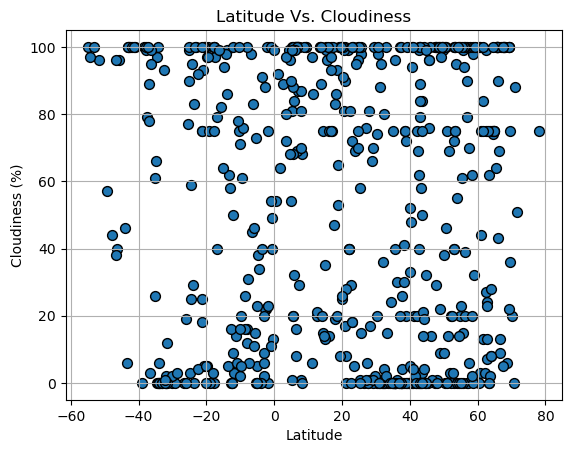

In [10]:
# Build scatter plot for latitude vs. temperature and incorporate propoerties
city_data_df.plot(kind='scatter', x = 'Lat', xlabel = 'Latitude', y = 'Cloudiness', ylabel = 'Cloudiness (%)', marker = 'o', title = 'Latitude Vs. Cloudiness', edgecolor = 'black', s = 50)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

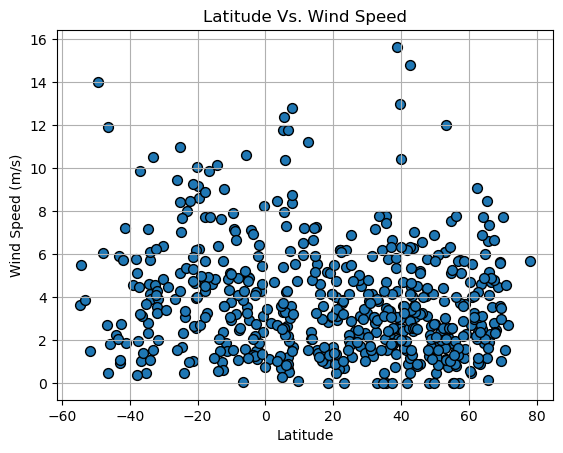

In [11]:
# Build scatter plot for latitude vs. temperature and incorporate propoerties
city_data_df.plot(kind='scatter', x = 'Lat', xlabel = 'Latitude', y = 'Wind Speed', ylabel = 'Wind Speed (m/s)', marker = 'o', title = 'Latitude Vs. Wind Speed', edgecolor = 'black', s = 50)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(northern_hemi)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,usogorsk,63.4106,48.6872,14.84,55,62,0.88,RU,1693296478
3,kudahuvadhoo,2.6708,72.8944,27.47,75,89,4.69,MV,1693296479
5,margate,51.3813,1.3862,15.94,77,14,1.79,GB,1693296480
8,isafjordur,66.0755,-23.1240,9.02,87,100,2.06,IS,1693296481
9,nadym,65.5333,72.5167,18.13,42,64,8.49,RU,1693296482


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df = pd.DataFrame(southern_hemi)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,22.72,35,0,2.81,ZA,1693296478
1,lebu,-37.6167,-73.6500,8.68,76,79,1.96,CL,1693296478
4,puerto natales,-51.7236,-72.4875,-0.77,92,96,1.47,CL,1693296479
6,coihueco,-36.6167,-71.8333,7.41,100,3,1.03,CL,1693296480
7,waitangi,-43.9535,-176.5597,8.79,78,46,2.24,NZ,1693296374


###  Temperature vs. Latitude Linear Regression Plot

y = -0.24x + 31.76
The r-squared is: 0.41699520739227613


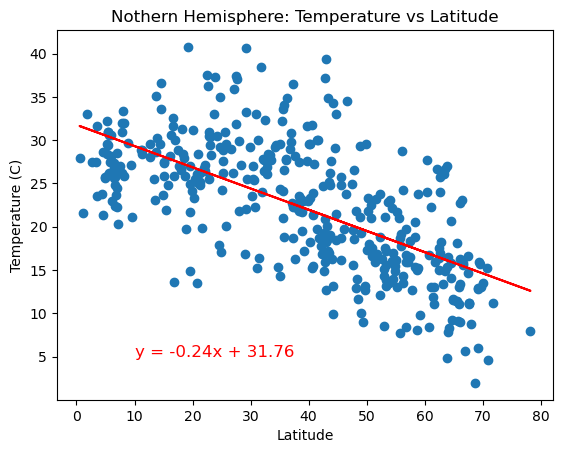

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
eq_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(eq_line,(10, 5),fontsize=12,color="red")
plt.title('Nothern Hemisphere: Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')

print(eq_line)
print(f"The r-squared is: {rvalue**2}")

y = 0.41x + 28.71
The r-squared is: 0.6090252250699846


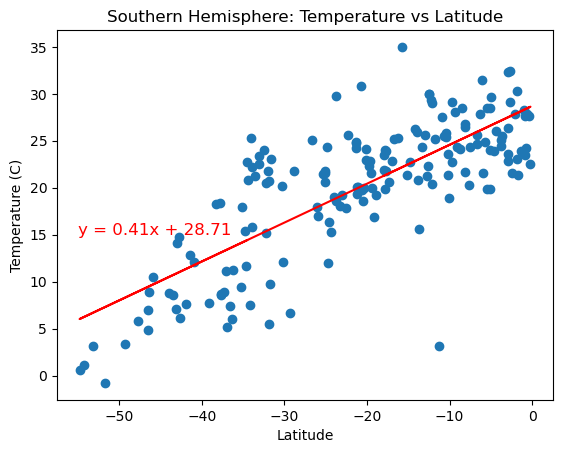

In [15]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
eq_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(eq_line,(-55, 15),fontsize=12,color="red")
plt.title('Southern Hemisphere: Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')

print(eq_line)
print(f"The r-squared is: {rvalue**2}")


**Discussion about the linear relationship:** There is a moderate to strong linear correlation between latitude and tempreature for the southern and northern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

y = -0.12x + 71.38
The r-squared is: 0.009191047075190384


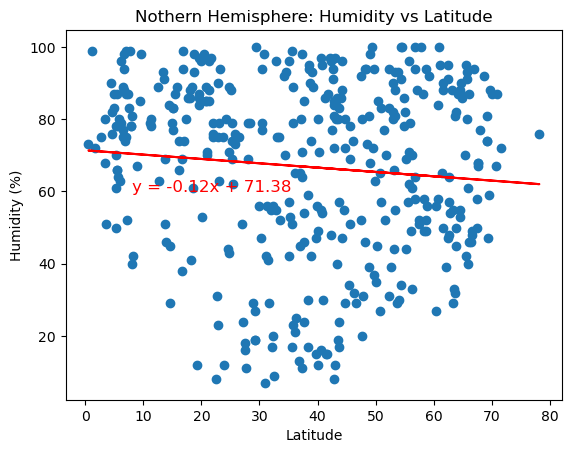

In [16]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
eq_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(eq_line,(8, 60),fontsize=12,color="red")
plt.title('Nothern Hemisphere: Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(eq_line)
print(f"The r-squared is: {rvalue**2}")

y = 0.04x + 68.48
The r-squared is: 0.000644921399332457


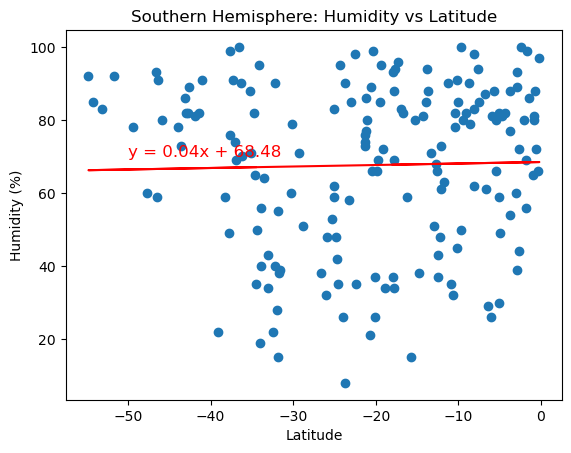

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
eq_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(eq_line,(-50, 70),fontsize=12,color="red")
plt.title('Southern Hemisphere: Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(eq_line)
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** There is a weak linear correlation between humidity and latitude for the southern and northern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.12x + 71.38
The r-squared is: 0.009191047075190384


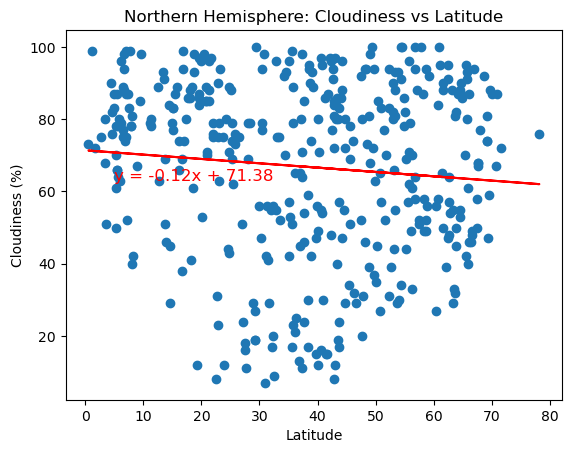

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
eq_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(eq_line,(5, 63),fontsize=12,color="red")
plt.title('Northern Hemisphere: Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(eq_line)
print(f"The r-squared is: {rvalue**2}")

y = 0.04x + 68.48
The r-squared is: 0.000644921399332457


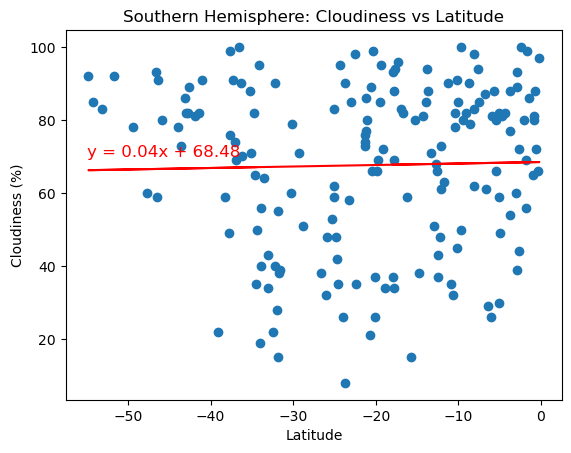

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
eq_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(eq_line,(-55, 70),fontsize=12,color="red")
plt.title('Southern Hemisphere: Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(eq_line)
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** There is a moderate to strong linear correlation between latitude and cloudiness for the southern and northern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.12x + 71.38
The r-squared is: 0.009191047075190384


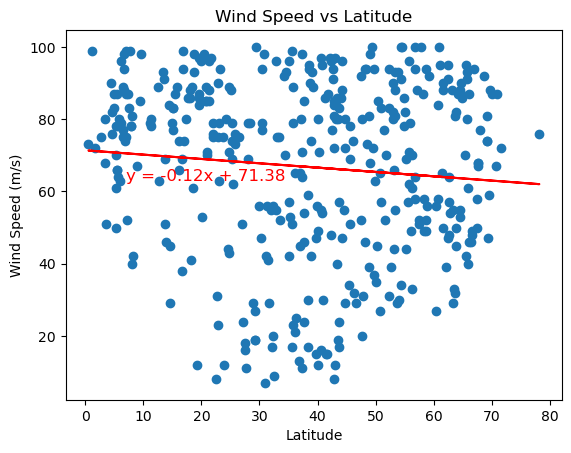

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
eq_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(eq_line,(7, 63),fontsize=12,color="red")
plt.title('Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

print(eq_line)
print(f"The r-squared is: {rvalue**2}")

y = 0.04x + 68.48
The r-squared is: 0.000644921399332457


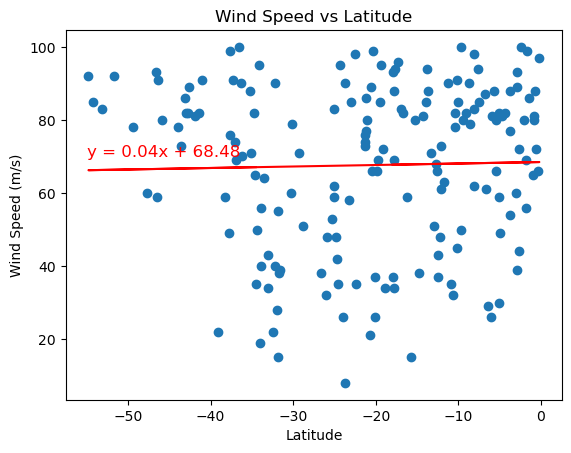

In [21]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
eq_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(eq_line,(-55, 70),fontsize=12,color="red")
plt.title('Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

print(eq_line)
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** There is a moderate to strong linear correlation between latitude and Wind Speed for the southern and northern hemispheres.